## Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.
També adjunt trobaràs una descripció de les diferents variables del dataset.

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [38]:
df = pd.read_csv('Documents/housingData.csv', names=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


- CRIM: Tasa de criminalidad per cápita por pueblo
- ZN: Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
- INDUS: Proporción de acres de negocios no minoristas por pueblo
- CHAS: Variable ficticia del río Charles (= 1 si el área limita con el río; 0 en caso contrario)
- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)
- RM: Número promedio de habitaciones por vivienda
- AGE: Proporción de unidades ocupadas por el propietario construidas antes de 1940
- DIS: Distancias ponderadas a cinco centros de empleo en Boston
- RAD: Índice de accesibilidad a carreteras radiales
- TAX: Tasa de impuestos a la propiedad de valor total por 10,000 ``$``
- PTRATIO: Relación alumno-maestro por pueblo
- B: 1000(Bk - 0.63)^2 donde Bk es la proporción de población negra por pueblo
- LSTAT: ``%`` de estatus más bajo de la población
- MEDV: Valor mediano de viviendas ocupadas por el propietario en miles de dólares ($1000)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [87]:
df.duplicated().sum()

0

No hay valores nulos ni duplicados.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [9]:
df.shape

(506, 14)

 la variable MEDV (valor medio de las viviendas ocupadas por sus propietarios en miles de dolares)será la variable target(y)

In [10]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [11]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.301641,8.140448,0.00632,0.079365,0.220825,2.745412,88.9762
ZN,404.0,11.224010,22.892617,0.00000,0.000000,0.000000,12.500000,95.0000
INDUS,404.0,10.841535,6.778945,0.46000,5.130000,8.560000,18.100000,27.7400
CHAS,404.0,0.071782,0.258447,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,404.0,0.548675,0.113115,0.38500,0.448750,0.524000,0.614000,0.8710
RM,404.0,6.281000,0.645634,3.86300,5.888000,6.221000,6.626000,8.7250
AGE,404.0,67.366337,28.355327,2.90000,43.250000,75.450000,93.825000,100.0000
DIS,404.0,3.864187,2.093014,1.12960,2.194300,3.324600,5.234500,12.1265
RAD,404.0,9.304455,8.558303,1.00000,4.000000,5.000000,8.000000,24.0000
TAX,404.0,402.059406,167.097426,187.00000,277.000000,329.000000,666.000000,711.0000


In [12]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,4.848823,10.177980,0.00906,0.090658,0.566535,4.522472,73.5341
ZN,102.0,11.916667,25.063887,0.00000,0.000000,0.000000,0.000000,100.0000
INDUS,102.0,12.306176,7.087393,1.25000,5.960000,12.830000,18.100000,27.7400
CHAS,102.0,0.058824,0.236456,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,102.0,0.578539,0.123960,0.40000,0.466000,0.582500,0.679000,0.8710
RM,102.0,6.299029,0.897133,3.56100,5.860500,6.171500,6.615250,8.7800
AGE,102.0,73.361765,26.919712,6.60000,59.000000,83.600000,94.950000,100.0000
DIS,102.0,3.521176,2.143771,1.32160,1.905925,2.640650,4.665725,10.7103
RAD,102.0,10.519608,9.254092,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,102.0,432.705882,172.791042,188.00000,285.500000,398.000000,666.000000,711.0000


#### Prueba de normalidad:
Definimos la hipótesis nula (H0) y la hipótesis alternativa (H1).

In [20]:
H0 = "Los datos de la variable siguen una distribución normal"
H1 = "Los datos de la variable NO siguen una distribución normal"

for i in X_test:
    stat, p = shapiro(X_test[i])
    alpha = 0.05
    if p > alpha:
        print(f'Los datos de la variable {i} siguen una distribución normal.')
    else:
        print(f'Los datos de la variable {i} NO siguen una distribución normal.')

Los datos de la variable CRIM NO siguen una distribución normal.
Los datos de la variable ZN NO siguen una distribución normal.
Los datos de la variable INDUS NO siguen una distribución normal.
Los datos de la variable CHAS NO siguen una distribución normal.
Los datos de la variable NOX NO siguen una distribución normal.
Los datos de la variable RM NO siguen una distribución normal.
Los datos de la variable AGE NO siguen una distribución normal.
Los datos de la variable DIS NO siguen una distribución normal.
Los datos de la variable RAD NO siguen una distribución normal.
Los datos de la variable TAX NO siguen una distribución normal.
Los datos de la variable PTRATIO NO siguen una distribución normal.
Los datos de la variable B NO siguen una distribución normal.
Los datos de la variable LSTAT NO siguen una distribución normal.


In [19]:
for i in X_train:
    stat, p = shapiro(X_train[i])
    alpha = 0.05
    if p > alpha:
        print(f'Los datos de la variable {i} siguen una distribución normal.')
    else:
        print(f'Los datos de la variable {i} NO siguen una distribución normal.')

Los datos de la variable CRIM NO siguen una distribución normal.
Los datos de la variable ZN NO siguen una distribución normal.
Los datos de la variable INDUS NO siguen una distribución normal.
Los datos de la variable CHAS NO siguen una distribución normal.
Los datos de la variable NOX NO siguen una distribución normal.
Los datos de la variable RM NO siguen una distribución normal.
Los datos de la variable AGE NO siguen una distribución normal.
Los datos de la variable DIS NO siguen una distribución normal.
Los datos de la variable RAD NO siguen una distribución normal.
Los datos de la variable TAX NO siguen una distribución normal.
Los datos de la variable PTRATIO NO siguen una distribución normal.
Los datos de la variable B NO siguen una distribución normal.
Los datos de la variable LSTAT NO siguen una distribución normal.


In [26]:
for i in X_train:
    statistic, p_value = mannwhitneyu(X_train[i], X_test[i])
    alpha = 0.05
    print(i)
    if p_value > alpha:
        print("No hay diferencias significativas entre 'train' y 'test'")
    else:
        print("hay diferencias significativas entre 'train' y 'test'.\n")

CRIM
No hay diferencias significativas entre 'train' y 'test'
ZN
No hay diferencias significativas entre 'train' y 'test'
INDUS
No hay diferencias significativas entre 'train' y 'test'
CHAS
No hay diferencias significativas entre 'train' y 'test'
NOX
No hay diferencias significativas entre 'train' y 'test'
RM
No hay diferencias significativas entre 'train' y 'test'
AGE
No hay diferencias significativas entre 'train' y 'test'
DIS
No hay diferencias significativas entre 'train' y 'test'
RAD
No hay diferencias significativas entre 'train' y 'test'
TAX
No hay diferencias significativas entre 'train' y 'test'
PTRATIO
No hay diferencias significativas entre 'train' y 'test'
B
No hay diferencias significativas entre 'train' y 'test'
LSTAT
No hay diferencias significativas entre 'train' y 'test'


In [ ]:
 el split se ha realitzado correctamente, no hay diferencias significativas entre train i test.

## Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

Para la creación de columnes dummies selecionamos variables categoriques:

In [7]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Comprobamos qué datos hay en  'CHAS' y 'RAD'. son las únicas variable que parecen ser categoricas.

In [33]:
df['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [34]:
df['RAD'].value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

'CHAS'  es una variables binaria por lo que no hará falta crear columnas dummies.

'RAD': en esta variable  en cambio podemos crear  columnes dummies en codigo binario

In [43]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [88]:
X_train_dummies = pd.get_dummies(X_train_copy["RAD"], prefix="RAD", dtype= int)
X_train_dummies

,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
167,0,0,0,0,1,0,0,0,0
457,0,0,0,0,0,0,0,0,1
34,0,0,0,1,0,0,0,0,0
321,0,0,0,0,1,0,0,0,0
293,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
66,0,0,0,1,0,0,0,0,0
220,0,0,0,0,0,0,0,1,0
150,0,0,0,0,1,0,0,0,0
85,0,0,1,0,0,0,0,0,0


In [89]:
X_test_dummies = pd.get_dummies(X_test_copy["RAD"], prefix="RAD",  dtype= int)
X_test_dummies

,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
42,0,0,1,0,0,0,0,0,0
201,0,1,0,0,0,0,0,0,0
35,0,0,0,0,1,0,0,0,0
393,0,0,0,0,0,0,0,0,1
269,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
132,0,0,0,1,0,0,0,0,0
494,0,0,0,0,0,1,0,0,0
98,0,1,0,0,0,0,0,0,0
47,0,0,1,0,0,0,0,0,0


 ## estandarización
 nos permiten ajustar y escalar nuestros datos para garantizar una comparabilidad precisa, minimizar el impacto de valores atípicos y mejorar la interpretación de los resultados. La estandarización se enfoca en la transformación de los datos para que tengan una media de cero y una desviación estándar de uno.
 
Realizamos grafico de boxplot para visualizar outliers.

Text(0.5, 1.0, 'X_train')

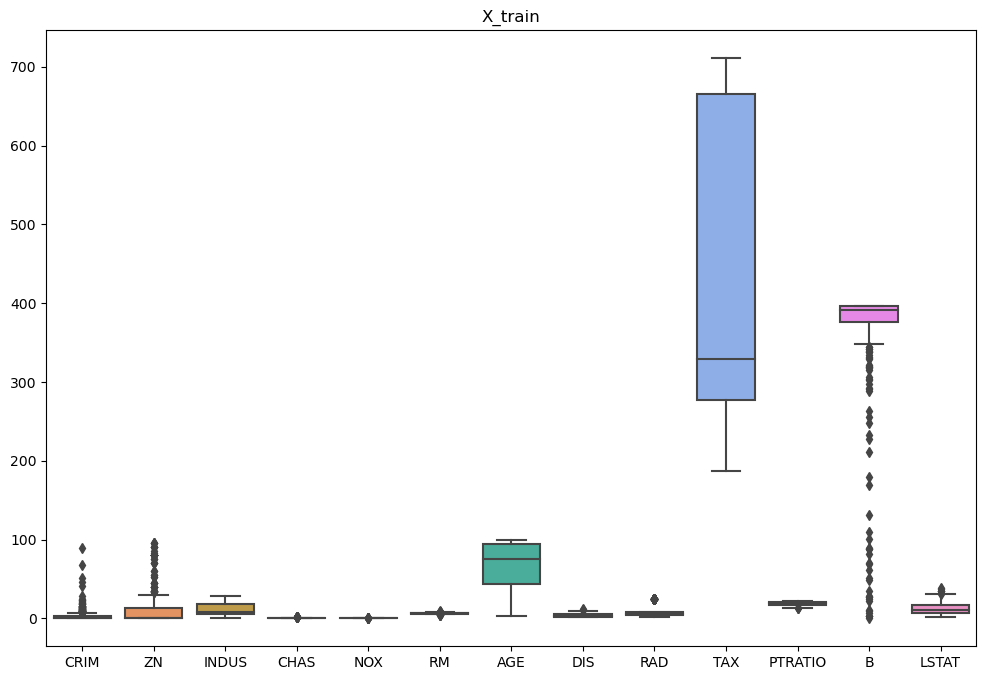

In [52]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(X_train)
plt.title('X_train')

Text(0.5, 1.0, 'X_test')

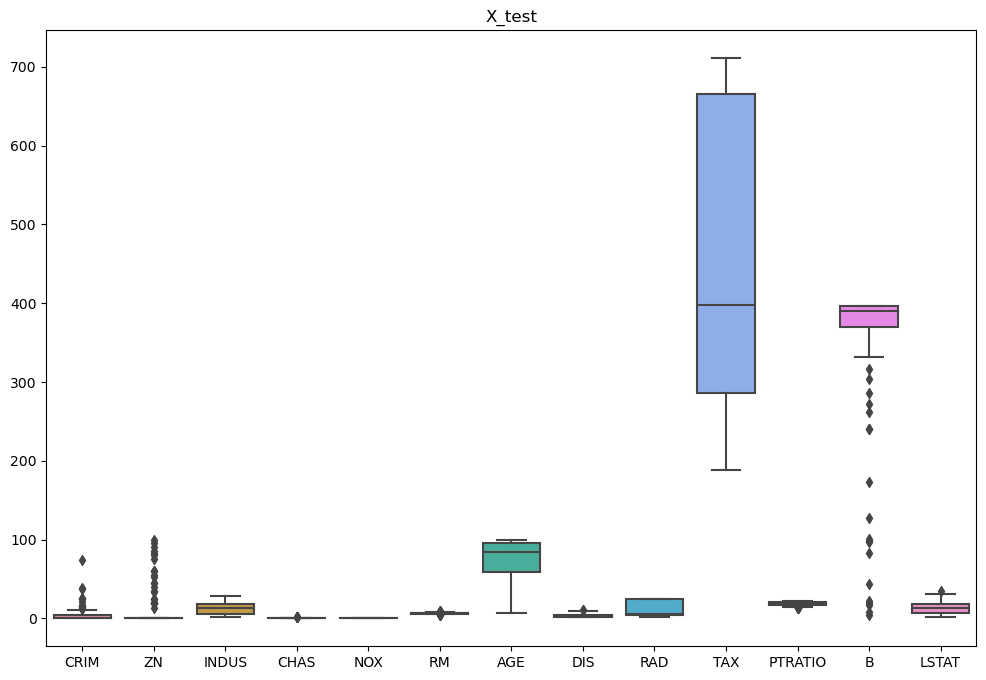

In [53]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(X_test)
plt.title('X_test')

Las variables CRIM, ZN, RM,DIS,PRATIO, B, LSTAT tienen outliers.(Usaremos modelo RobustScaler)

Las variables INDUS, NOX, AGE, TAX no tienen outliers (Usaremos modelo MinMaxScaler).

Las variables RAD ya la hemos transformado antes y CHAS tiene valores binarios por lo que ya no hay estandarizar estas variables.

In [70]:
variables_con_outliers = ['CRIM', 'ZN','RM', 'DIS', 'PTRATIO', 'B', 'LSTAT','CHAS'] 
variables_sin_outliers = ['INDUS', 'NOX', 'AGE', 'TAX']

In [71]:
scaling = RobustScaler()

X_train_Robust = scaling.fit_transform(X_train_copy[variables_con_outliers])
X_train_robust = pd.DataFrame(X_train_Robust, columns=variables_con_outliers)
X_train_robust


,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,CHAS
0,0.592433,0.0,-0.466125,-0.295606,-1.411765,-8.115480,0.116071,0.0
1,2.993103,0.0,-0.386179,-0.179396,0.436975,-19.199060,0.620273,0.0
2,0.522119,0.0,-0.169377,0.143148,0.705882,-7.091741,0.977416,0.0
3,-0.014717,0.0,0.210027,0.399908,0.235294,0.256924,-0.437500,0.0
4,-0.051828,0.0,-0.127371,0.716433,-0.974790,0.256924,-0.257878,0.0
...,...,...,...,...,...,...,...,...
399,-0.066404,6.4,-0.588076,1.081146,-0.941176,0.256924,-0.083508,0.0
400,0.051486,0.0,0.989160,-0.152260,-0.504202,-0.000247,-0.139181,1.0
401,0.538541,0.0,-0.134146,-0.561345,-1.411765,-0.934965,0.321954,0.0
402,-0.061317,0.0,0.554201,0.366127,-0.134454,0.029426,-0.473214,0.0


In [72]:
X_test_robust = pd.DataFrame(X_test_Robust, columns=variables_con_outliers)
X_test_Robust = scaling.transform(X_test_copy[variables_con_outliers])
X_test_robust

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,CHAS
0,-0.029754,0.0,-0.070461,0.788205,-0.336134,-0.412216,-0.548845,0.0
1,-0.069907,6.6,-0.079946,0.968818,-1.411765,0.102127,-0.378676,0.0
2,-0.058759,0.0,-0.390244,0.011743,0.100840,0.256924,-0.142332,0.0
3,3.159709,0.0,-0.037940,-0.504375,0.436975,0.256924,0.434349,0.0
4,-0.048827,1.6,-0.407859,0.195020,-0.100840,-0.018051,0.274685,1.0
...,...,...,...,...,...,...,...,...
97,0.138492,0.0,0.204607,-0.328005,0.773109,-0.294016,0.008929,0.0
98,0.022034,0.0,-0.399729,-0.310144,0.100840,0.256924,0.268382,0.0
99,-0.052120,0.0,2.166667,0.056115,-0.302521,0.090257,-0.784139,0.0
100,0.003168,0.0,-0.258808,0.777844,-0.336134,0.051187,0.815651,0.0


In [90]:
scaling = MinMaxScaler()

X_train_MinMax = scaling.fit_transform(X_train_copy[variables_sin_outliers])
X_train_MinMax = pd.DataFrame(X_train_MinMax, columns=variables_sin_outliers)
X_train_MinMax

,INDUS,NOX,AGE,TAX
0,0.700880,0.452675,0.785788,0.412214
1,0.646628,0.674897,0.797116,0.914122
2,0.281525,0.314815,0.968074,0.229008
3,0.253666,0.222222,0.529351,0.190840
4,0.493402,0.106996,0.159629,0.194656
...,...,...,...,...
399,0.106672,0.026749,0.290422,0.286260
400,0.210411,0.251029,0.881565,0.229008
401,0.700880,1.000000,0.972194,0.412214
402,0.147727,0.131687,0.547889,0.114504


In [91]:
X_test_MinMax = scaling.transform(X_test_copy[variables_sin_outliers])
X_test_MinMax = pd.DataFrame(X_test_MinMax, columns=variables_sin_outliers)
X_test_MinMax

,INDUS,NOX,AGE,TAX
0,0.236437,0.129630,0.038105,0.087786
1,0.057551,0.061728,0.365602,0.307252
2,0.201613,0.234568,0.672503,0.175573
3,0.646628,0.633745,0.923790,0.914122
4,0.238270,0.162551,0.603502,0.068702
...,...,...,...,...
97,0.785557,0.491770,0.978373,0.477099
98,0.338343,0.411523,0.408857,0.389313
99,0.089076,0.123457,0.350154,0.169847
100,0.236437,0.129630,0.850669,0.087786


Ahora que ya tenemos todos los datos tranformados lo que hacemos es concatenar todos los dataframes generados.

In [94]:
X_train_final = pd.concat([X_train_robust.reset_index(drop=True),
                           X_train_MinMax.reset_index(drop=True),
                           X_train_dummies.reset_index(drop=True)],axis=1)
X_train_final

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,CHAS,INDUS,NOX,...,TAX,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.592433,0.0,-0.466125,-0.295606,-1.411765,-8.115480,0.116071,0.0,0.700880,0.452675,...,0.412214,0,0,0,0,1,0,0,0,0
1,2.993103,0.0,-0.386179,-0.179396,0.436975,-19.199060,0.620273,0.0,0.646628,0.674897,...,0.914122,0,0,0,0,0,0,0,0,1
2,0.522119,0.0,-0.169377,0.143148,0.705882,-7.091741,0.977416,0.0,0.281525,0.314815,...,0.229008,0,0,0,1,0,0,0,0,0
3,-0.014717,0.0,0.210027,0.399908,0.235294,0.256924,-0.437500,0.0,0.253666,0.222222,...,0.190840,0,0,0,0,1,0,0,0,0
4,-0.051828,0.0,-0.127371,0.716433,-0.974790,0.256924,-0.257878,0.0,0.493402,0.106996,...,0.194656,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.066404,6.4,-0.588076,1.081146,-0.941176,0.256924,-0.083508,0.0,0.106672,0.026749,...,0.286260,0,0,0,1,0,0,0,0,0
400,0.051486,0.0,0.989160,-0.152260,-0.504202,-0.000247,-0.139181,1.0,0.210411,0.251029,...,0.229008,0,0,0,0,0,0,0,1,0
401,0.538541,0.0,-0.134146,-0.561345,-1.411765,-0.934965,0.321954,0.0,0.700880,1.000000,...,0.412214,0,0,0,0,1,0,0,0,0
402,-0.061317,0.0,0.554201,0.366127,-0.134454,0.029426,-0.473214,0.0,0.147727,0.131687,...,0.114504,0,0,1,0,0,0,0,0,0


In [95]:
X_test_final = pd.concat([X_test_robust.reset_index(drop=True),
                          X_test_MinMax.reset_index(drop=True), 
                          X_test_dummies.reset_index(drop=True)], axis=1)
X_test_final

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,CHAS,INDUS,NOX,...,TAX,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.029754,0.0,-0.070461,0.788205,-0.336134,-0.412216,-0.548845,0.0,0.236437,0.129630,...,0.087786,0,0,1,0,0,0,0,0,0
1,-0.069907,6.6,-0.079946,0.968818,-1.411765,0.102127,-0.378676,0.0,0.057551,0.061728,...,0.307252,0,1,0,0,0,0,0,0,0
2,-0.058759,0.0,-0.390244,0.011743,0.100840,0.256924,-0.142332,0.0,0.201613,0.234568,...,0.175573,0,0,0,0,1,0,0,0,0
3,3.159709,0.0,-0.037940,-0.504375,0.436975,0.256924,0.434349,0.0,0.646628,0.633745,...,0.914122,0,0,0,0,0,0,0,0,1
4,-0.048827,1.6,-0.407859,0.195020,-0.100840,-0.018051,0.274685,1.0,0.238270,0.162551,...,0.068702,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.138492,0.0,0.204607,-0.328005,0.773109,-0.294016,0.008929,0.0,0.785557,0.491770,...,0.477099,0,0,0,1,0,0,0,0,0
98,0.022034,0.0,-0.399729,-0.310144,0.100840,0.256924,0.268382,0.0,0.338343,0.411523,...,0.389313,0,0,0,0,0,1,0,0,0
99,-0.052120,0.0,2.166667,0.056115,-0.302521,0.090257,-0.784139,0.0,0.089076,0.123457,...,0.169847,0,1,0,0,0,0,0,0,0
100,0.003168,0.0,-0.258808,0.777844,-0.336134,0.051187,0.815651,0.0,0.236437,0.129630,...,0.087786,0,0,1,0,0,0,0,0,0


## Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [96]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   RM       102 non-null    float64
 3   DIS      102 non-null    float64
 4   PTRATIO  102 non-null    float64
 5   B        102 non-null    float64
 6   LSTAT    102 non-null    float64
 7   CHAS     102 non-null    float64
 8   INDUS    102 non-null    float64
 9   NOX      102 non-null    float64
 10  AGE      102 non-null    float64
 11  TAX      102 non-null    float64
 12  RAD_1    102 non-null    int32  
 13  RAD_2    102 non-null    int32  
 14  RAD_3    102 non-null    int32  
 15  RAD_4    102 non-null    int32  
 16  RAD_5    102 non-null    int32  
 17  RAD_6    102 non-null    int32  
 18  RAD_7    102 non-null    int32  
 19  RAD_8    102 non-null    int32  
 20  RAD_24   102 non-null    int32  
dtypes: float64(12), 

In [97]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   RM       404 non-null    float64
 3   DIS      404 non-null    float64
 4   PTRATIO  404 non-null    float64
 5   B        404 non-null    float64
 6   LSTAT    404 non-null    float64
 7   CHAS     404 non-null    float64
 8   INDUS    404 non-null    float64
 9   NOX      404 non-null    float64
 10  AGE      404 non-null    float64
 11  TAX      404 non-null    float64
 12  RAD_1    404 non-null    int32  
 13  RAD_2    404 non-null    int32  
 14  RAD_3    404 non-null    int32  
 15  RAD_4    404 non-null    int32  
 16  RAD_5    404 non-null    int32  
 17  RAD_6    404 non-null    int32  
 18  RAD_7    404 non-null    int32  
 19  RAD_8    404 non-null    int32  
 20  RAD_24   404 non-null    int32  
dtypes: float64(12), 

#### comparación df inicial -  df final

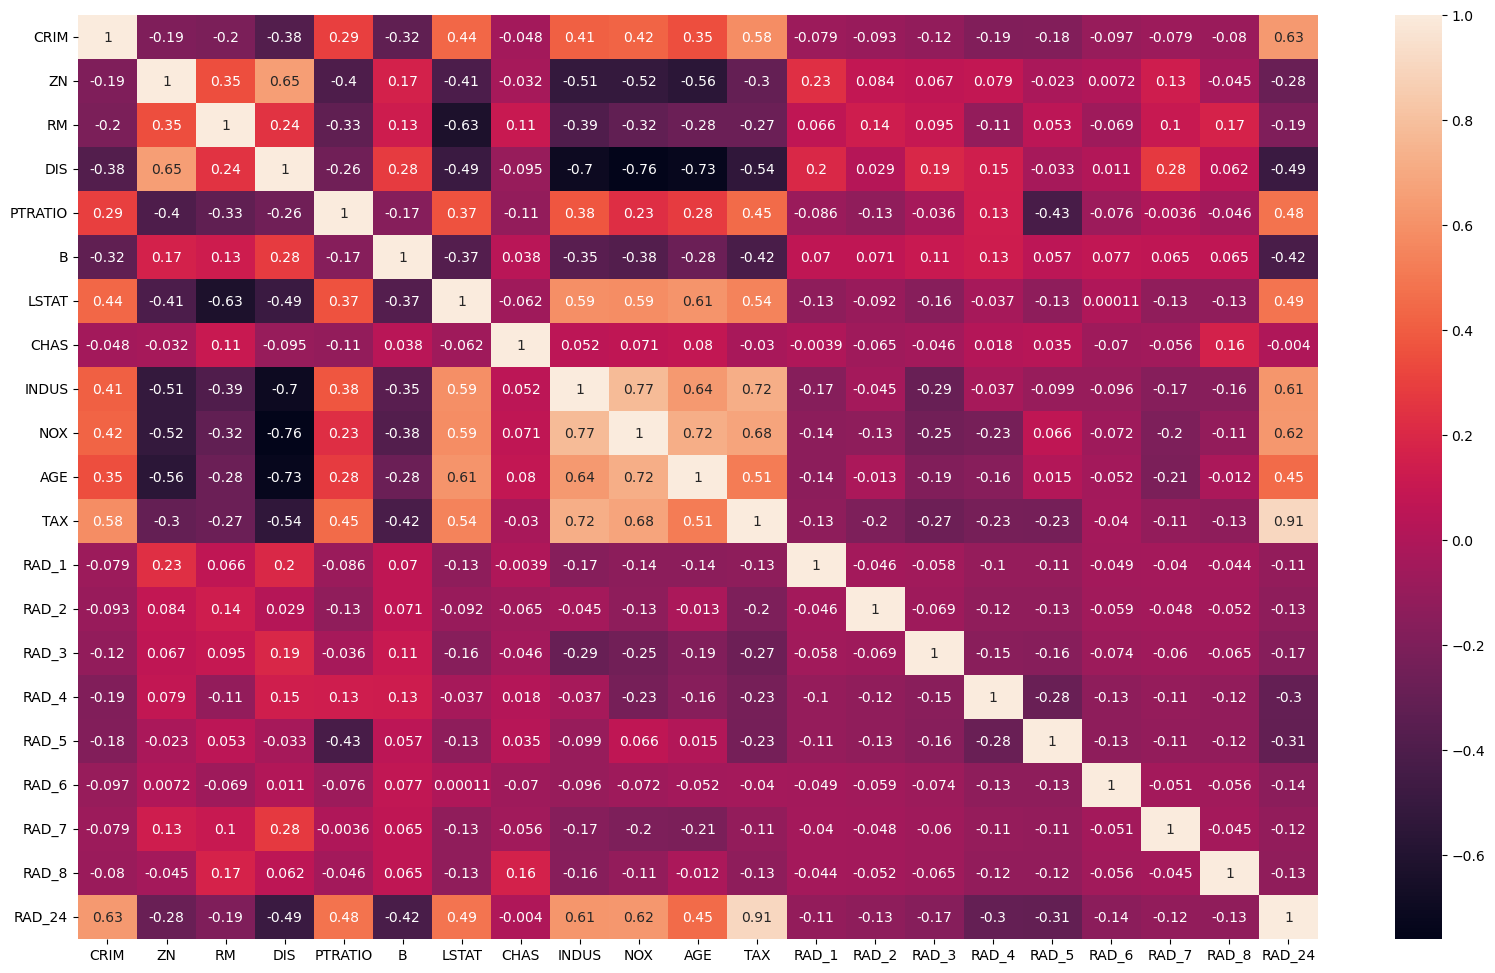

In [99]:
corr = X_train_final.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

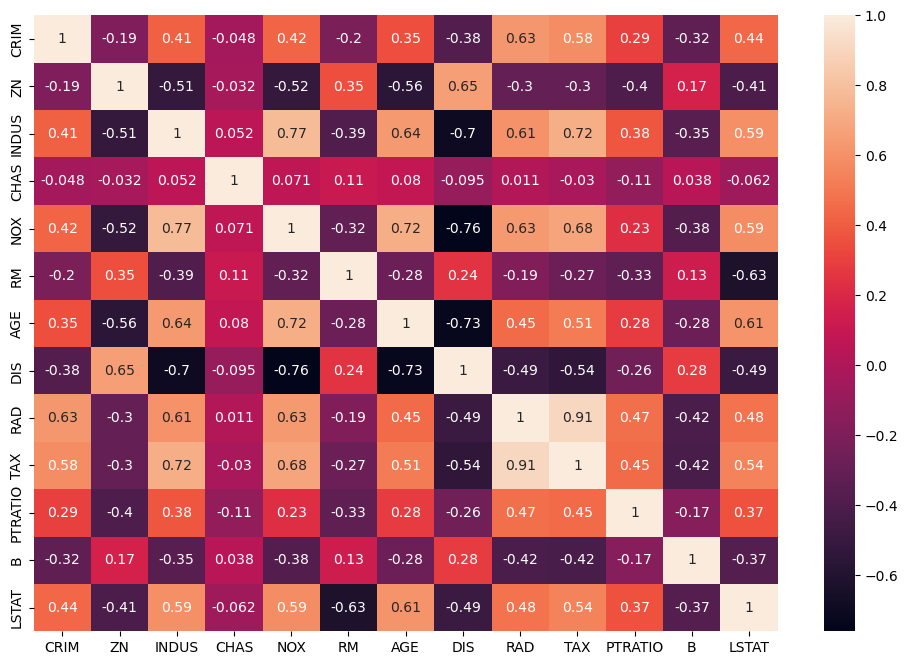

In [105]:
corr2 = X_train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr2, annot=True)
plt.show()

Los valores con mayor correlación se mantienen iguales (tanto en valores negativos como en valores positivo)

KeyError: 'RAD'

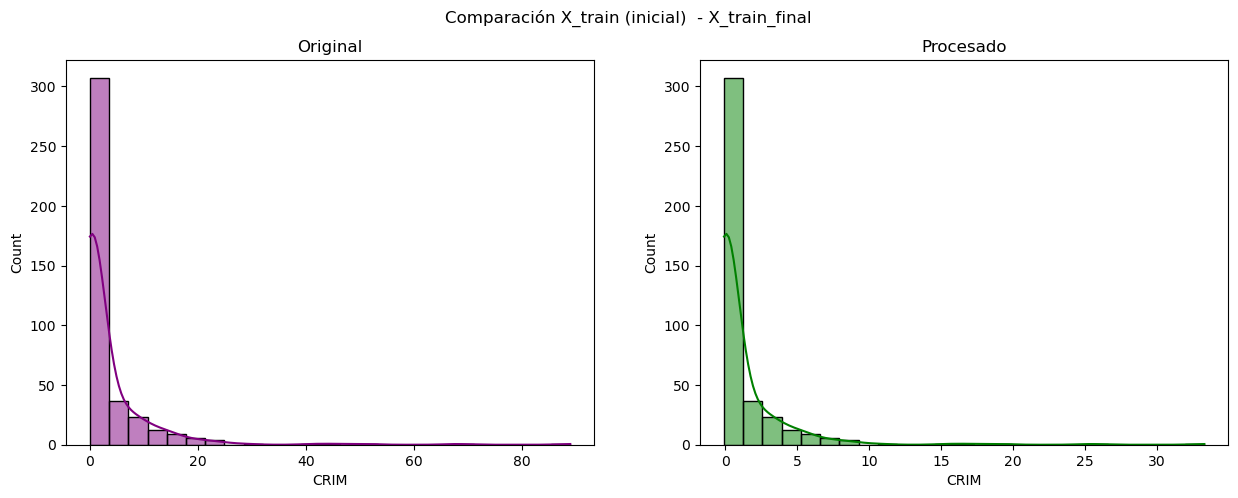

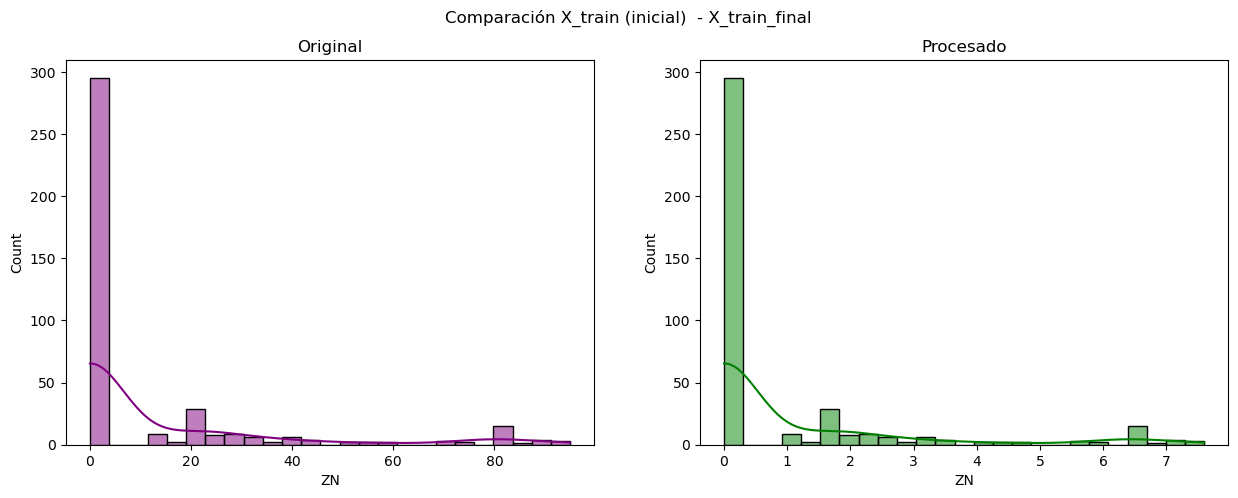

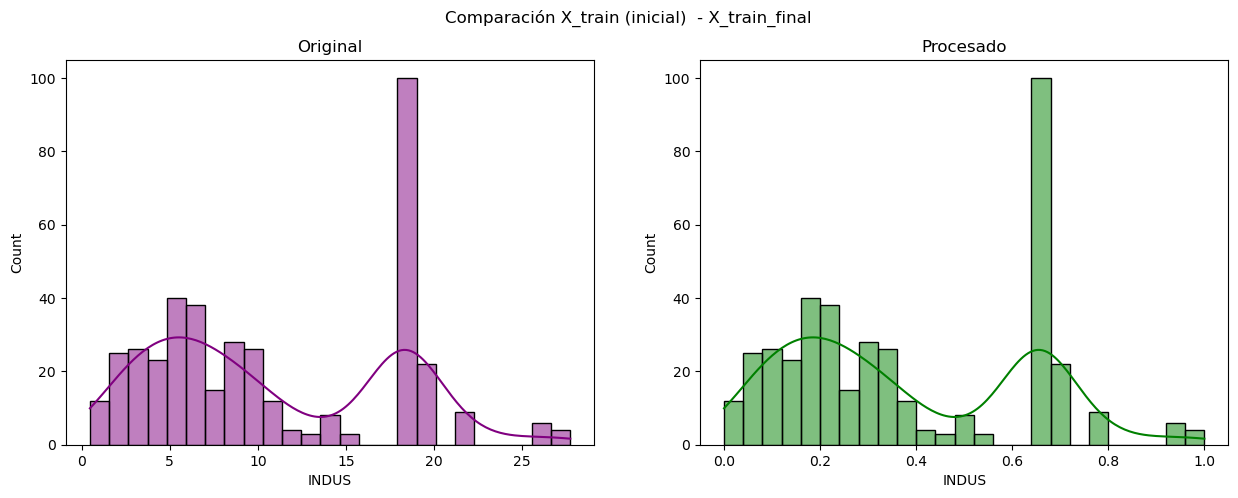

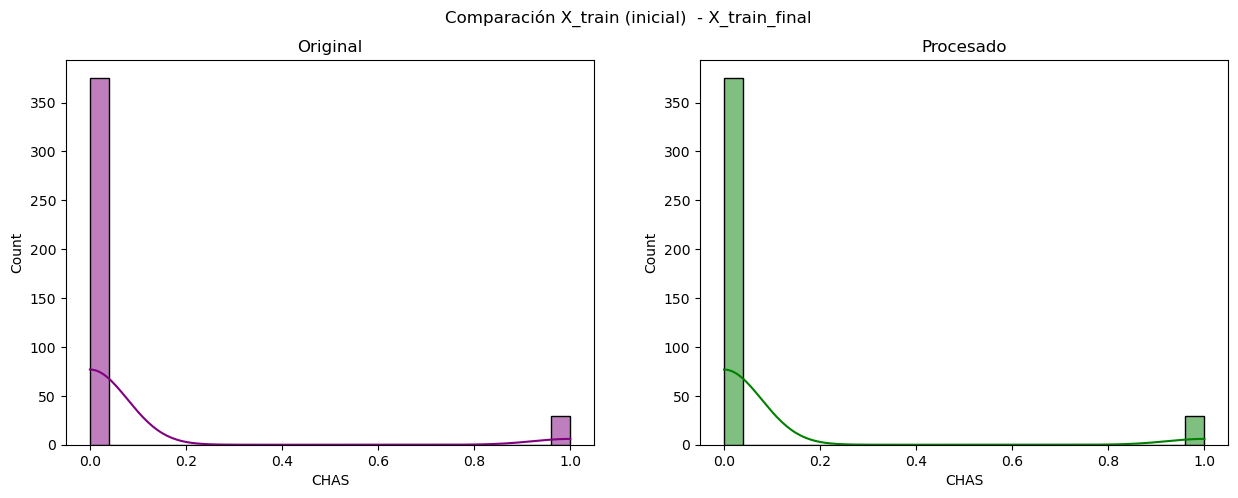

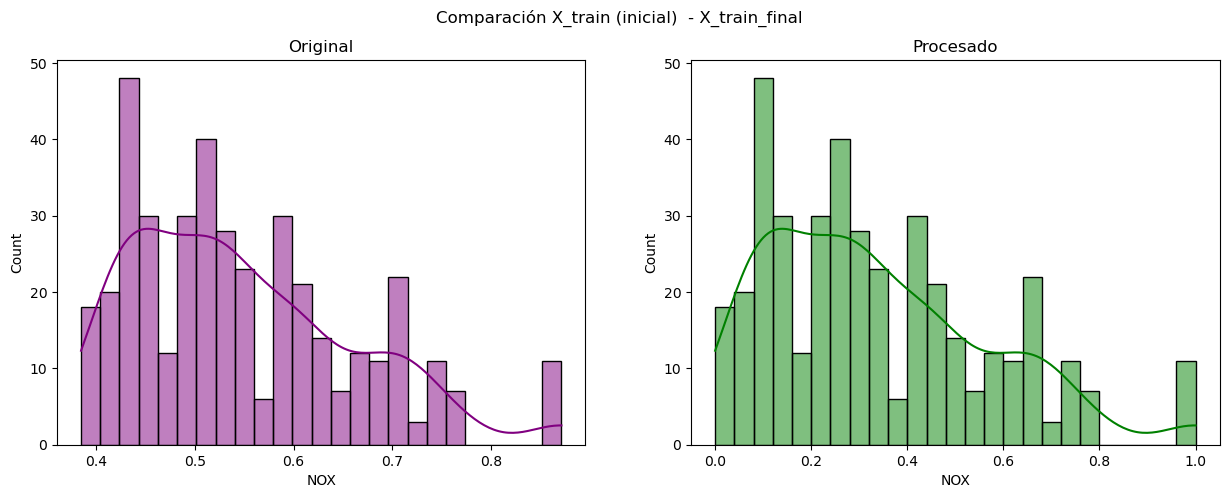

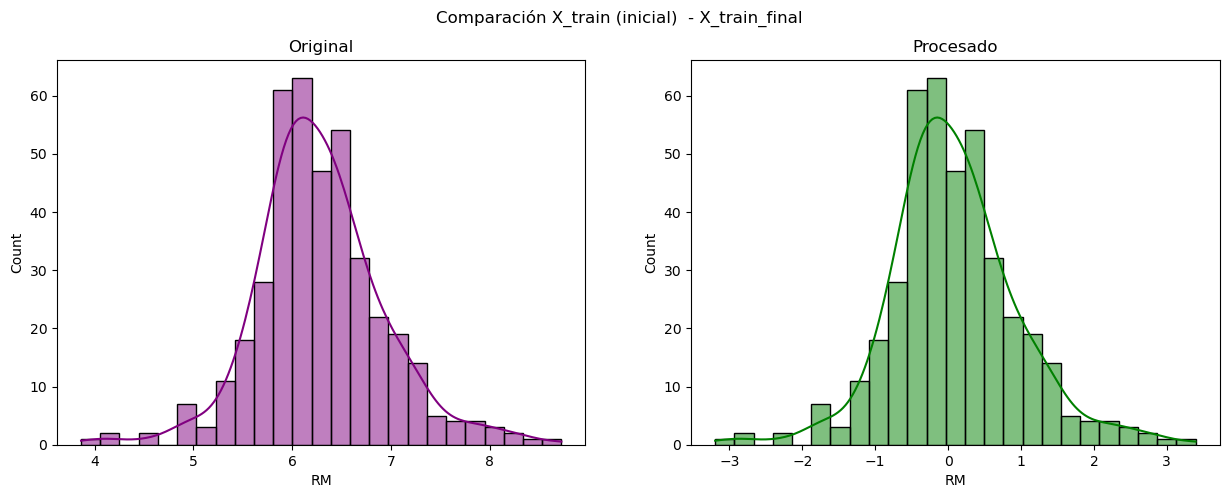

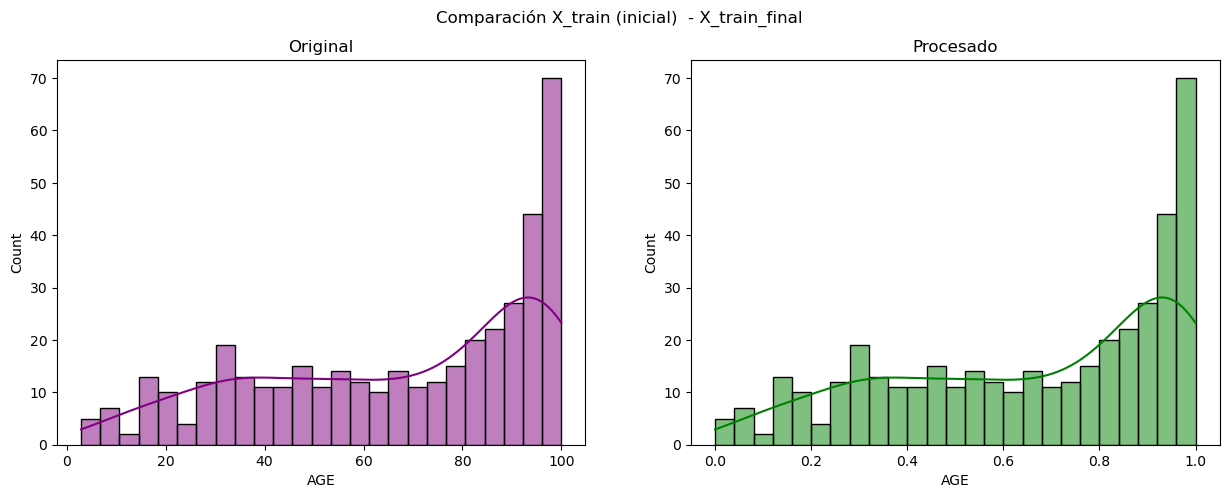

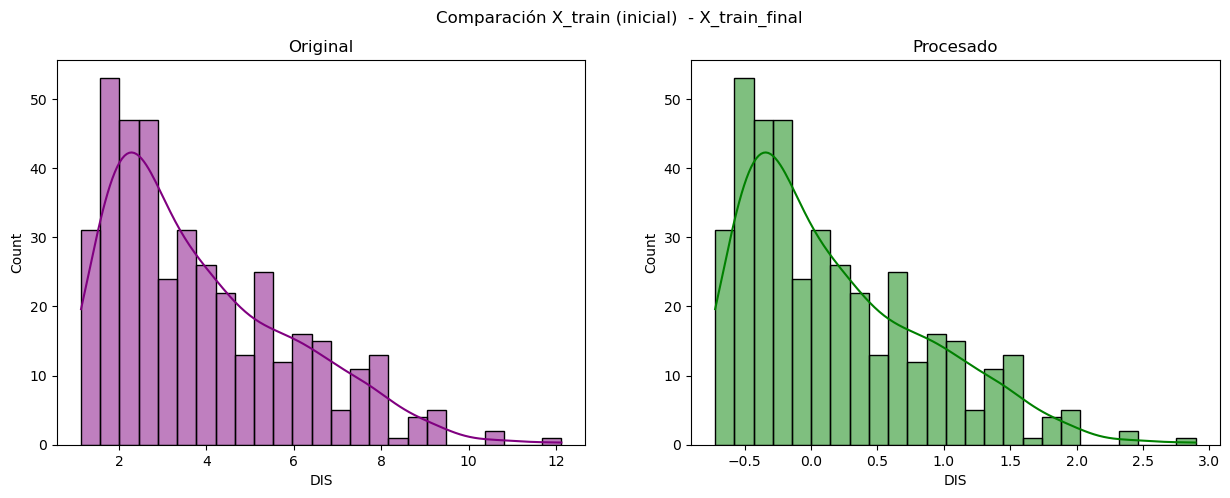

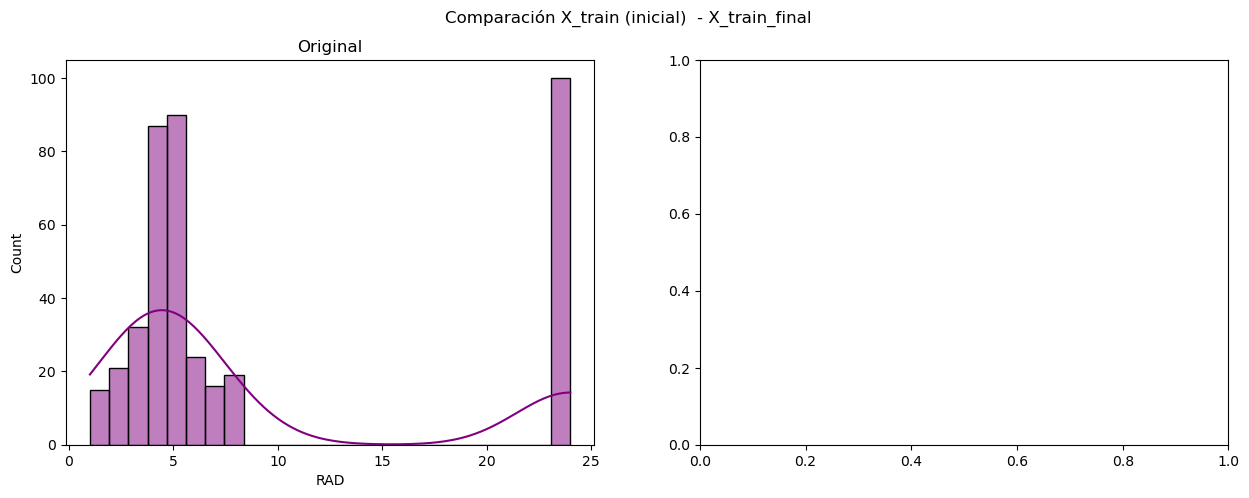

In [110]:
for i in df:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('Comparación X_train (inicial)  - X_train_final')

    sns.histplot(ax=axes[0], data=X_train, x=X_train[i], bins=25, color='purple', kde=True)
    axes[0].set_title('Original')
    
    sns.histplot(ax=axes[1], data=X_train_final, x=X_train_final[i], bins=25, color='green', kde=True)
    axes[1].set_title('Procesado')

plt.show


En la variable 'RAD' no es posible realizar el gráfico de X_train_final ya que esta columna se ha transformado realizando dummies.

 a parte de esto podemos ver que los gráficos siguen la misma distribución, de esta manera  podemos comprobar que la estandarización no ha alterado los valores